In [1]:
import numpy as np
from redmapper_halo_centered import RedMapperHaloCentered
from cluster_validation import *

%matplotlib inline

In [2]:
#Using catalogs in example code to verify consistent values, smaller truth catalog due to performance
redmapper_catalog_name='cosmoDC2_v1.1.4_redmapper_v0.7.5' 
dc2_catalog_name='cosmoDC2_v1.1.4'

redmapper_catalog_nm_old = 'cosmoDC2_v1.1.4_redmapper_v0.2.1py'
dc2_catalog_name_small = 'cosmoDC2_v1.0_9556'

rmhc = RedMapperHaloCentered(redmapper_catalog_name, dc2_catalog_name_small)

rmhc.cluster_only = False
rmhc.min_halo_mass = 3e14
rmhc.min_richness = 20

In [3]:
true_galaxy_data, true_halo_data = rmhc.get_true_data()
cluster_data = rmhc.get_cluster_data()
member_data = rmhc.get_member_data()

print("Number of elements in the truth catalog = ", len(true_galaxy_data))
print("Number of halos in the truth catalog = ", len(true_halo_data))
print("Number of clusters in the detection catalog = ", len(cluster_data))

Number of elements in the truth catalog =  570
Number of halos in the truth catalog =  3
Number of clusters in the detection catalog =  2796
Cluster catalog sky area =  439.78987 deg2
Truth catalog sky area =  3.357174580844667 deg2


In [ ]:
#check the cosmological parameters in the two catalogs
print("Cluster catalog sky area = ", rmhc.redmapper_catalog.sky_area, "deg2")
print("Truth catalog sky area = ", rmhc.truth_catalog.sky_area, "deg2")
print('Cosmo in truth catalog:', rmhc.redmapper_catalog.cosmology)
print('Cosmo in detection catalog:', rmhc.truth_catalog.cosmology)
print('Halo mass definition in truth catalog:', rmhc.truth_catalog.halo_mass_def)

In [ ]:
print('Catalog info in truth catalog:', rmhc.truth_catalog.get_catalog_info())
print('Catalog info in detection catalog:', rmhc.redmapper_catalog.get_catalog_info())

In [ ]:
rmhc.plot_basic_cluster_halo_position()

In [4]:
match_num_truth_to_det, match_num_det_to_truth, ind_bijective = rmhc.associate_nearest_angle(delta_zmax=np.inf, theta_max=1.)

In [ ]:
match_num_truth_to_det, match_num_det_to_truth, ind_bijective = rmhc.associate_nearest_distance(delta_zmax=0.05, theta_max=1.)

In [ ]:
match_num_truth_to_det, match_num_det_to_truth, ind_bijective = rmhc.associate_nearest_scaled(delta_zmax=0.05, theta_max=1.)

In [ ]:
match_num_truth_to_det, match_num_det_to_truth, ind_bijective = rmhc.associate_fixed_membership(delta_zmax=0.05, theta_max=1.)

Number of bijective associations 3
Number and fraction of fragmentation (0, 0.0)
Number and fraction of overmerging (0, 0.0)
Completeness 1.0
Purity 0.14055793988519066


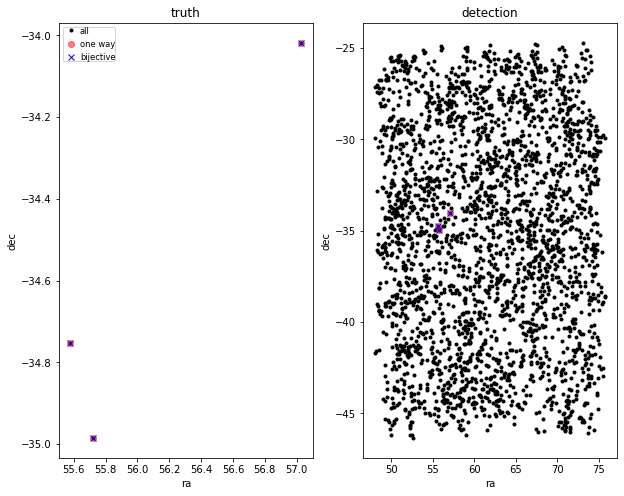

In [5]:
rmhc.print_stats(match_num_truth_to_det, match_num_det_to_truth, ind_bijective)